In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [4]:
desminado  = pd.read_csv('SituacionDesminadoHumanitario.csv')
educacion  = pd.read_csv('EducacionRiesgoMinas.csv')
casos      = pd.read_csv('EventosMinas.csv')
victimas   = pd.read_csv('VictimasMinas.csv')
municipios = pd.read_csv('MunicipiosDANE.csv')

In [5]:
educacion["FECHA_FINALIZACION"] = pd.to_datetime(educacion["FECHA_FINALIZACION"])
educacion["FECHA_INICIO"] = pd.to_datetime(educacion["FECHA_INICIO"], format="%m/%d/%Y %I:%M:%S %p", infer_datetime_format=False)   # 11/13/2019 12:00:00 AM    "%m/%d/%Y %I:%M:%S %p"
educacion["DURACION"] = educacion["FECHA_FINALIZACION"] - educacion["FECHA_INICIO"]
educacion["DURACION"] = educacion["DURACION"].apply(lambda x: x.days+1)
educacion = educacion[educacion["DURACION"] == 1]

In [6]:
victimas = victimas.rename(columns={"ano":"AÑO","mes":"MES","codigodanemunicipio":"CODIGO_DANE_MUNICIPIO"})

In [7]:
# date: month,year
def filterData(df, mun_dane_code=None, date=(None,None)):
  victimas = df
  month, year = date
  if month != None and year != None:
    victimas = victimas[(victimas["AÑO"]==year) & (victimas["MES"]==month)]
  if mun_dane_code != None:
    victimas = victimas[victimas["CODIGO_DANE_MUNICIPIO"] == mun_dane_code]
  return victimas

In [9]:
def getDate(month,year):
    if month < 10:
        fecha = '01/0' + str(month) + '/' + str(year)
    else:
        fecha = '01/' + str(month) + '/' + str(year)
    return fecha

In [8]:
def getDateAux(date):
    month,year = date
    return getDate(month,year)

In [10]:
def getTimeSeries(df,mun_dane_code):
    for year in range(1990,2020):
        for month in range(1,12):
            fecha = getDate(month,year)
            casos_filtered = filterData(casos,mun_dane_code,date=(month,year))
            nCasos = len(casos_filtered)
            row = { 'fecha':fecha,
                    'casos':nCasos,
                    #'municipio':mun_dane_code
                  }
            #if nCasos > 0:
            df = df.append(row, ignore_index=True)
    return df

In [11]:
#municipio = 52835  # Tumaco
municipio = 50711  # Vista Hermosa - Meta
#municipio = 50251   # El castillo - Meta
df = pd.DataFrame({'casos': pd.Series([], dtype='int'),
                   'fecha': pd.Series([], dtype='string')})
timeSeries = pd.DataFrame(columns=['fecha','casos'])
timeSeries = getTimeSeries(timeSeries,municipio)
timeSeries['fecha'] = pd.to_datetime(timeSeries['fecha'], format='%d/%m/%Y')
timeSeries['casos'] = pd.to_numeric(timeSeries['casos'])
timeSeries = timeSeries.set_index('fecha')
#timeSeries.sort_index(inplace=True)
#timeSeries = timeSeries['casos']

<AxesSubplot:xlabel='fecha'>

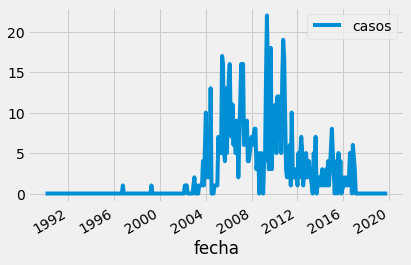

In [12]:
timeSeries.plot()

<ipython-input-13-68609914aea1>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

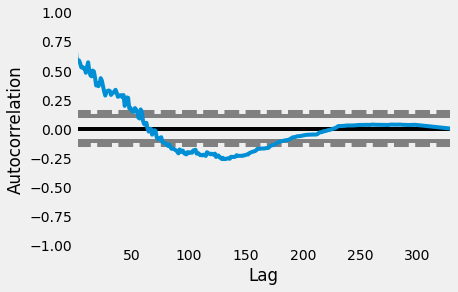

In [13]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(timeSeries)
#pyplot.show()